# Terry Stop Legal Analysis and Prediction

## Project Overview

The goal of this project is to build a machine learning model that predicts whether an arrest was made following a Terry Stop. Using features such as the presence of weapons, the time of day, and other contextual factors recorded during the stop, the model classifies each case as either resulting in an arrest or not.
This is a binary classification problem.

## 1. Business Understanding

By analyzing this data, the project aims to:
- Understand which factors most influence the likelihood of an arrest.
- Explore patterns or potential biases in Terry Stops.
- Demonstrate the use of supervised learning techniques in a real-world legal and social context.


Include stakeholder and key business questions

## 2. Data Understanding
Source of data : This data is from the Seattle Police Department

In [1]:
#Importing the needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [2]:
#Load the data
df = pd.read_csv("Terry_Stops_20250507.csv")

In [3]:
#Look at the dataset
df.head(5)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,9770358745,20190000313099,9770376049,Field Contact,-,5653,1967,M,Black or African American,...,00:25:27.0000000,SHOPLIFT - THEFT,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,SOUTH PCT 2ND W - ROBERT - PLATOON 2,N,N,-,-,-
1,26 - 35,-1,20160000282794,180985,Arrest,Handgun,6355,1970,F,White,...,07:09:00.0000000,DISTURBANCE,NARCOTICS - OTHER,911,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,East,C,C3
2,26 - 35,-1,20180000002480,438562,Field Contact,NaN,7564,1979,M,Declined to Answer,...,13:50:00.0000000,-,-,-,WEST PCT 2ND W - DAVID BEATS,N,N,-,-,-
3,36 - 45,-1,20180000065356,392012,Offense Report,NaN,7514,1987,M,White,...,02:09:00.0000000,ROBBERY - CRITICAL (INCLUDES STRONG ARM),ROBBERY - ARMED,911,NORTH PCT 3RD W - BOY (JOHN) - PLATOON 1,N,N,North,L,L2
4,56 and Above,-1,20170000004325,309626,Field Contact,NaN,6783,1976,M,White,...,15:00:00.0000000,-,-,-,EAST PCT 2ND W - GEORGE - PLATOON 2,N,N,-,-,-


In [4]:
#Number of rows and columns
df.shape

(63462, 23)

In [5]:
#Overview of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63462 entries, 0 to 63461
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         63462 non-null  object
 1   Subject ID                63462 non-null  int64 
 2   GO / SC Num               63462 non-null  int64 
 3   Terry Stop ID             63462 non-null  int64 
 4   Stop Resolution           63462 non-null  object
 5   Weapon Type               30897 non-null  object
 6   Officer ID                63462 non-null  object
 7   Officer YOB               63462 non-null  int64 
 8   Officer Gender            63462 non-null  object
 9   Officer Race              63462 non-null  object
 10  Subject Perceived Race    63462 non-null  object
 11  Subject Perceived Gender  63462 non-null  object
 12  Reported Date             63462 non-null  object
 13  Reported Time             63462 non-null  object
 14  Initial Call Type     

Description of data: The dataset contains 5,000 records with 8 categorical features, such as 'Arrest Made' (Yes/No). Most data types are objects, with only one date at  Officer YOB and three other IDs.

## Data Preparation
The data preparation has 2 parts cleaning and preprocessing for modeling.

### Data cleaning
First, I will check for Nulls, duplicate rows and change the Officer YOB type in
to a date and the ID columns into strings to help with filtering and parsing.

In [6]:
#Finding Nulls
df.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

In [7]:
#Fill in the nulls with N/A
df['Weapon Type'].fillna('NaN', inplace=True)
df['Officer Squad'].fillna('NaN', inplace=True)

In [8]:
#Looking for duplicate rows
df.duplicated().value_counts()

False    63462
Name: count, dtype: int64

There are no duplicate rows

In [9]:
#Convert data types for easy analysis
df['Officer YOB'] = pd.to_datetime(df['Officer YOB'], format='%Y')
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df[['Subject ID', 'GO / SC Num' ,'Terry Stop ID']] = df[['Subject ID', 'GO / SC Num' ,'Terry Stop ID']].astype(str)

In [10]:
#Overview of updated columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63462 entries, 0 to 63461
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Subject Age Group         63462 non-null  object             
 1   Subject ID                63462 non-null  object             
 2   GO / SC Num               63462 non-null  object             
 3   Terry Stop ID             63462 non-null  object             
 4   Stop Resolution           63462 non-null  object             
 5   Weapon Type               63462 non-null  object             
 6   Officer ID                63462 non-null  object             
 7   Officer YOB               63462 non-null  datetime64[ns]     
 8   Officer Gender            63462 non-null  object             
 9   Officer Race              63462 non-null  object             
 10  Subject Perceived Race    63462 non-null  object             
 11  Subject Perceiv

In [11]:
#Clean the categories eg remove spaces and standardize 
df['Subject Age Group'] = df['Subject Age Group'].str.strip()

In [12]:
#Clean the classification columns in Frisk Flag
'''
The frisk column will be a classification column and needs to be cleaned to only have Yes and No classifications which are two.
'''
df = df[df['Frisk Flag'] != '-']

### Detailed Overview of the data


I will have a look at the distribution of specific columns, including the age group, and then a look at the trend of reports over time.

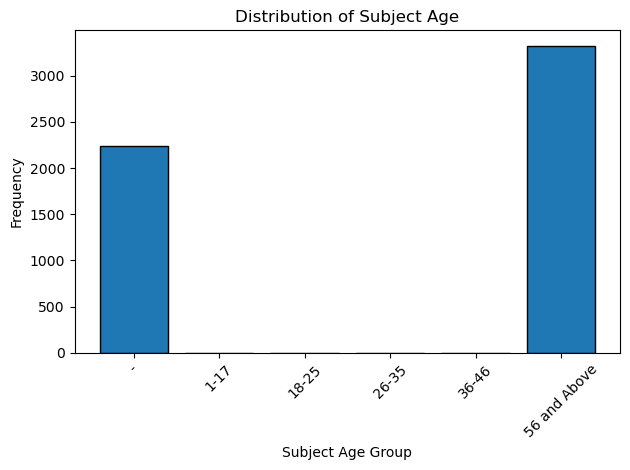

In [13]:
# Distribution of Subject Age (using bar instead, because I want to order the columns)

order = ['-', '1-17', '18-25', '26-35', '36-46', '56 and Above']

# Count the frequencies in your DataFrame
age_counts = df['Subject Age Group'].value_counts().reindex(order, fill_value=0)

plt.bar(age_counts.index, age_counts.values, edgecolor='black')
plt.title('Distribution of Subject Age')
plt.xlabel('Subject Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\MichelleChekwooti\AppData\Local\Temp\ipykernel_19784\2507407185.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_trend = df['Reported Date'].dt.to_period('M').value_counts().sort_index()


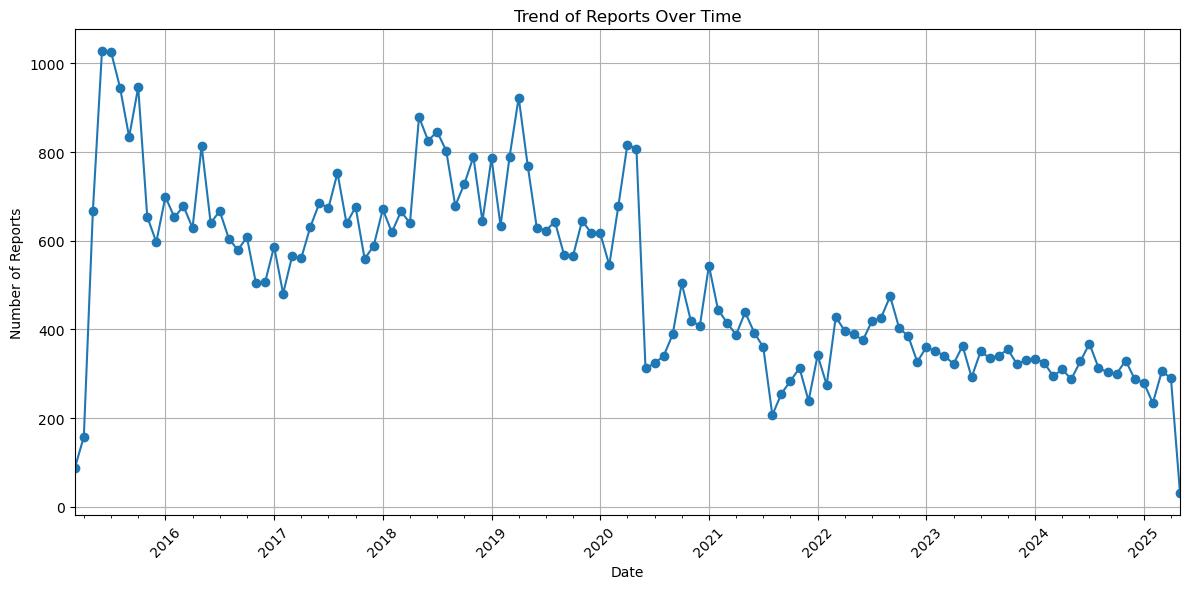

In [14]:
# trend of reports over time
df_trend = df['Reported Date'].dt.to_period('M').value_counts().sort_index()

df_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trend of Reports Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing
I will now choose the X and Y and prepare them , this also includes looking for issues,one hot encoding and imbalance in the dataset.

In [15]:
#To delete
df.iloc[:, -5:]  # all rows, last 5 columns

,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,N,N,-,-,-
1,N,N,East,C,C3
2,N,N,-,-,-
3,N,N,North,L,L2
4,N,N,-,-,-
...,...,...,...,...,...
63457,N,N,South,O,O1
63458,N,N,East,G,G2
63459,Y,N,West,M,M3
63460,N,N,Southwest,W,W2


In [16]:
#To delete
num_cols = df.shape[1]
start = num_cols // 3
end = 2 * (num_cols // 3)
middle_df = df.iloc[:, start:end]
middle_df

,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time
0,1967-01-01,M,Black or African American,White,Male,2019-08-23 00:00:00+00:00,00:25:27.0000000
1,1970-01-01,F,White,Black or African American,Male,2016-08-06 00:00:00+00:00,07:09:00.0000000
2,1979-01-01,M,Declined to Answer,Hispanic,Male,2018-07-06 00:00:00+00:00,13:50:00.0000000
3,1987-01-01,M,White,Unknown,Female,2018-02-22 00:00:00+00:00,02:09:00.0000000
4,1976-01-01,M,White,White,Male,2017-09-16 00:00:00+00:00,15:00:00.0000000
...,...,...,...,...,...,...,...
63457,1981-01-01,M,White,-,Female,2019-08-04 00:00:00+00:00,10:49:29.0000000
63458,1971-01-01,M,Asian,Black or African American,Female,2018-08-12 00:00:00+00:00,20:21:00.0000000
63459,1976-01-01,M,Asian,White,Male,2019-06-03 00:00:00+00:00,11:19:03.0000000
63460,1991-01-01,M,White,Black or African American,Female,2023-09-05 00:00:00+00:00,19:32:29.0000000


In [17]:
# Define X and y
X = df[['Subject Age Group', 'Call Type', 'Subject Perceived Gender']]
y = df['Arrest Flag']

In [18]:
# One hot encoding to convert the categories
ohe = OneHotEncoder(sparse=False)
data_coded = df[['Subject Age Group', 'Call Type', 'Subject Perceived Gender']].copy()
data_coded

,Subject Age Group,Call Type,Subject Perceived Gender
0,26 - 35,ONVIEW,Male
1,26 - 35,911,Male
2,26 - 35,-,Male
3,36 - 45,911,Female
4,56 and Above,-,Male
...,...,...,...
63457,36 - 45,ONVIEW,Female
63458,1 - 17,ONVIEW,Female
63459,26 - 35,"TELEPHONE OTHER, NOT 911",Male
63460,-,ONVIEW,Female


In [19]:
#Fit the encoded data
X_encoded = ohe.fit_transform(data_coded)

C:\Users\MichelleChekwooti\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
#Find the column names and create a dataframe for the encoded figures
column_names = ohe.get_feature_names_out(data_coded.columns)

encoded_data = pd.DataFrame(X_encoded, columns=column_names)
encoded_data

,Subject Age Group_-,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Call Type_-,Call Type_911,Call Type_ALARM CALL (NOT POLICE ALARM),...,Call Type_SCHEDULED EVENT (RECURRING),"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE,Subject Perceived Gender_-,Subject Perceived Gender_Female,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_MULTIPLE SUBJECTS,Subject Perceived Gender_Male,Subject Perceived Gender_Unable to Determine,Subject Perceived Gender_Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62979,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
62980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
62981,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62982,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Modeling

I will be using Logistic Regresstion and Decision tress

In [21]:
#Split the data into Train and Test
'''
I chose a test size of 80% for training and a random state of 42.
'''
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=42)

Logistic Regresstion

In [28]:
#Fitting the model
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, solver='liblinear')

In [29]:
#Predict
y_pred_test = logreg.predict(X_test)

NameError: name 'y_pred' is not defined

In [ ]:
Decition Tree

## Evaluation
Summary of conclusions including three relevant findings